In [2]:
from IPython.core.display import HTML
import pandas as pd 

pd.set_option('display.float_format', lambda x: '%.3f' % x)

def set_css_style(css_file_path):
    """
    Read the custom CSS file and load it into Jupyter.
    Pass the file path to the CSS file.
    """
    styles = open(css_file_path, "r").read()
    return HTML(styles)

set_css_style('styles/custom.css')


### Plotting and Visualization
- Unlike R, Python does not come with sophisticated visualization libraries included in the standard library

- However, Python has a plethora of external libraries to visualize data. These range from the standard statistical visualizations to much more complex, interactive and rich visualizations.
  - Here, we will cover the standard plots that are traditionally used to visualize or summarize data

- `matplotlib` is the de-factor standard for generating data plots
  - Was designed over 15 years ago to resemble MATLAB but still is the most powerful framework
  -  Can be at times low-level and ambiguous, since it forces a MATLAB-similar syntax

- `Matplotlib` has spawned many add-on toolkits for data visualization that build on top of `Matplotlib` and make it easier to generate publication ready plots



### Plotting and Visualization

- Some popular plotting/visualization tools are:

- Seaborn: https://seaborn.pydata.org/examples/index.html
  - Desktop publishing with best practices to that is based on research on how people best perceive information
  - Good default parameters

- Plotly (https://plot.ly/python/)
  - Has an API for Python (as well as other languages)
  - The app itself is built on Python and DJANGO
  - The same company that created Dash, which we will be using in class

- Bokeh (https://bokeh.pydata.org/en/latest/docs/gallery.html)
  -  Python interactive visualization for web browsers 

- Dash by plotly (https://dash.plot.ly/gallery)  
  - Intuitive to use, elegant design interactive
  
  


### Matplotlib: a Brief Intro

- The module that handles plotting in Matplotlib is called `pyplot`
- It is often imported with the alias `pyplot`

```python
import matplotlib.pyplot as plt
```

- to be able see plots directly in Jupyter, we need to instruct `matplotlib` to show plots `inline`; i.e., below the code used to create them.
 - This is done using the following command 

```python
%matplotlib inline 

```


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

### Figures and (sub)plots

- Plots in `matplotlib` reside within a Figure object

```pytho
fig = plt.figure()
```

- However, figures are empty by default. Therefore, you need to add a subplot to to see something
  - This returns the axes of a new subplot
```python
axes = fig.subplots()
```

- Finally, you can define the type of plot you'd like to create
```python
axes.plot(x_data, y_data)
```

In [73]:
fig = plt.figure(figsize=(8,6))
axes = fig.subplots()

x_data = pd.Series([0, 1,2,3,4,5,6,7,8,9])
y_data  = x_data  ** 2

axes.plot(x_data , y_data )

AttributeError: 'list' object has no attribute 'plot'

# Color and Symbols

- Functions in `matplotlib` takes a numebr of parameters that change their behavior. For instance, In addition to the data, the `plot` function takes the parameters `color` and `linestyle` which change the line's color and style

```python
plt.plot(x,y, color='k', linestyle='--')
```

- For convenience, parameters `color` `linestyle` can be combined into a single parameter. The construct plot function is commonly written using as:

```python

    plt.plot(x,y, 'k--')
```


Some of the common color and markers used to plot lines can be found at the following URL: 

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html


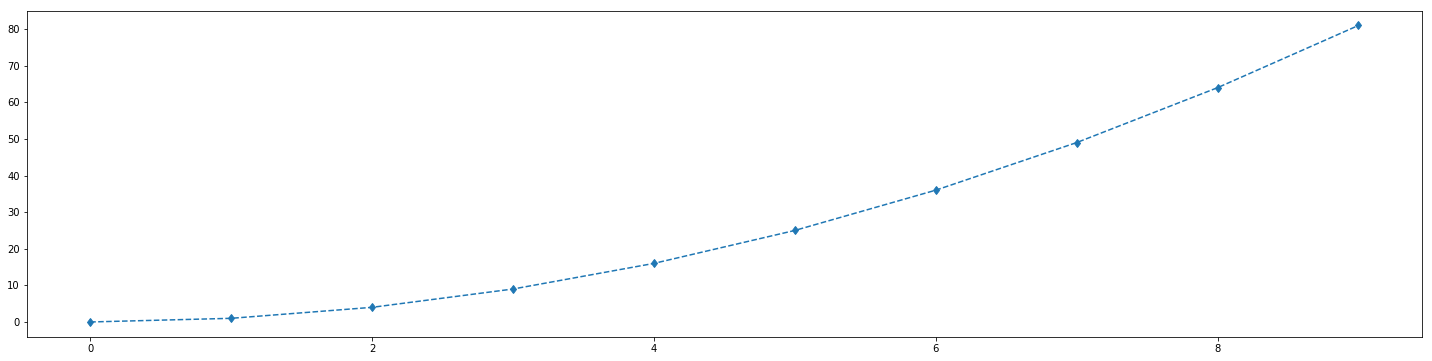

In [74]:
fig = plt.figure(figsize=(25,6))
axes = fig.subplots()



axes.plot(x_data, y_data, 'd--')


### `matplotlib` Shortcuts

- When you issue the command plt.plot(x_data, y_data), the following happens
  - matplotlib uses the figure created in a cell or creates one if none exists
  - Uses the last subplot used or creates one if necessary

- Therefore, rather than manually creating a figure and subplots, you can call the `plot` function wich will automatically generate this.

- Additionally, you can combine multiple plot calls in the same cell and they will all appear on the first subplot that was generated

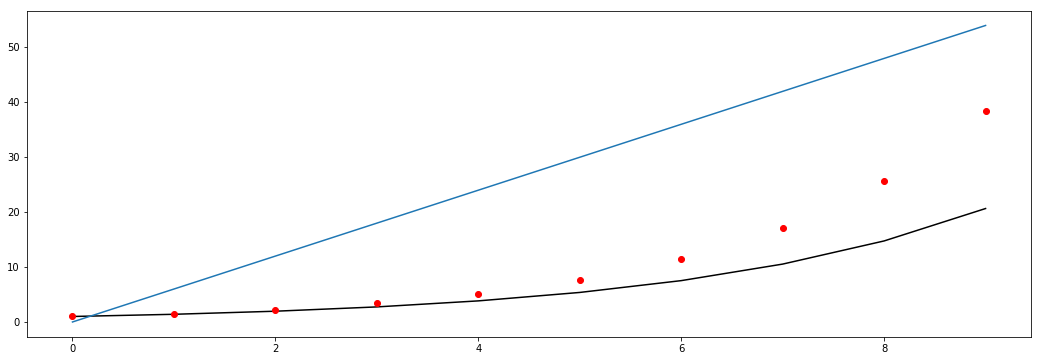

In [75]:
fig = plt.figure(figsize=(18,6))

a_data = 1.4 ** x_data
b_data = 1.5 ** x_data
c_data = 6 * x_data

plt.plot(x_data, a_data, 'k-')
plt.plot(x_data, b_data, 'ro')
plt.plot(x_data, c_data, '-')


### Adding x-axis label, y-axis label and a Title 
- `plt` has the methods `xlabel`, `ylabel` and `title` which can be use to add x- and y-axis labels, as well as a title
- The mehtods can also take font size and other more advanced parameters.






Text(0.5,1,'Exploring Pyplot')

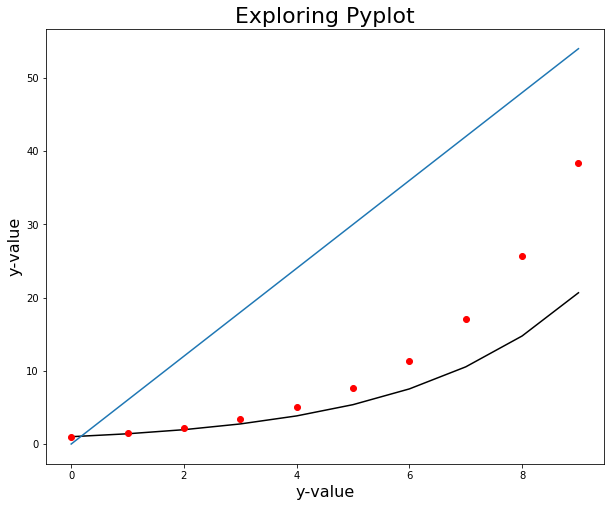

In [190]:
plt.figure(figsize=(10,8))
a_data = 1.4 ** x_data
b_data = 1.5 ** x_data
c_data = 6 * x_data

plt.plot(x_data, a_data, 'k-')
plt.plot(x_data, b_data, 'ro')
plt.plot(x_data, c_data, '-')
plt.xlabel("y-value", fontsize=16)

plt.ylabel("y-value", fontsize=16)
plt.title("Exploring Pyplot", fontsize=22)

### Adding Legends
- Adding legends is a two step process:
  1. Passing a label to the plot method
  2. calling the legend() function on the plot
  - the label can include `latex` equations

- The legend is placed on the plot in a way that interferes the least with the plot
  - You can change the location, font and size of the legend manually

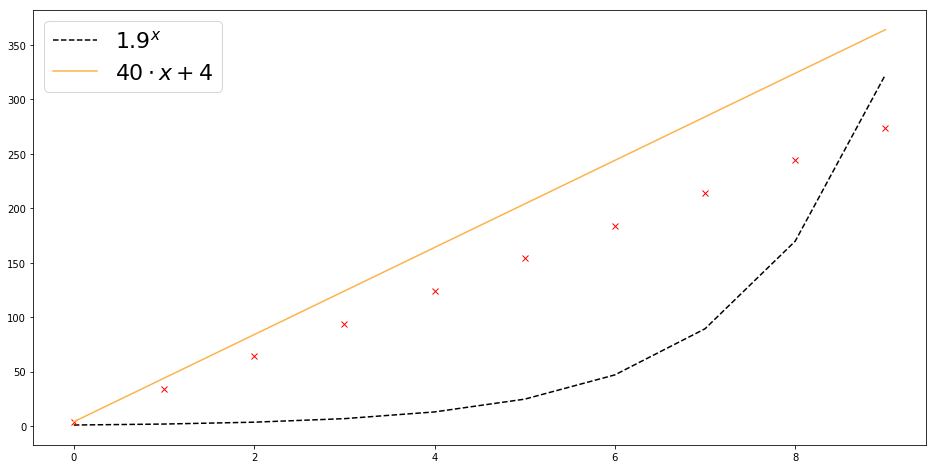

In [191]:
plt.figure(figsize=(16,8))

a_data = 1.9** x_data
plt.plot(x_data, a_data, 'k--', label= "$1.9^x$")

b_data = 30*x_data + 4
plt.plot(x_data, b_data, 'rx', label= "_no_legend_")

c_data = 40 * x_data + 4
plt.plot(x_data, c_data, color='#feb24c', label= "$ 40 \cdot x + 4$")

plt.legend(fontsize=22)

### Using Subplots 
- Rather than using a single subplot per figure, we can define a grid of subplots 
- When creating the grid, you need to specify the number of plots per row and column you would like to create. 
For instance, to create a grid with 1 row and 3 columns, we would write:

```python
fig = plt.figure()
axes =  fig.subplots(1,3)
```

- Here we need to be explict and call the specific axis we need to plot in. 


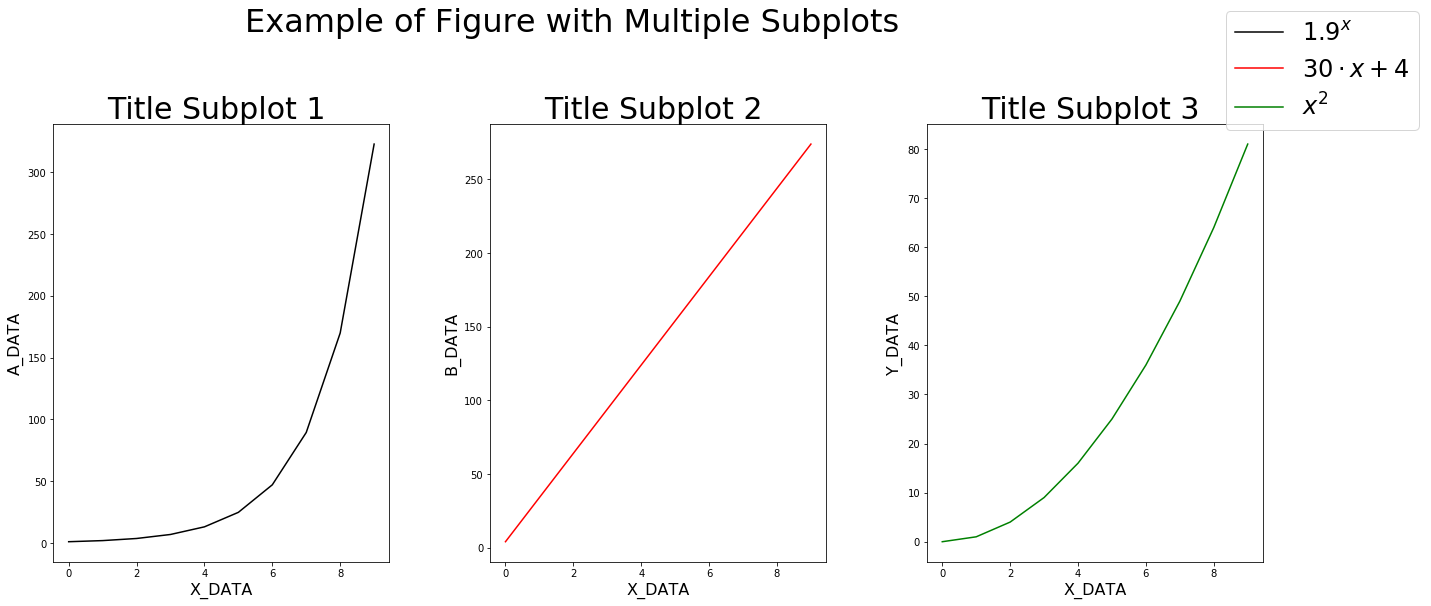

In [192]:
fig = plt.figure(figsize=(24,9))

plt.subplots_adjust(left=0.2, wspace=0.3, top=0.8)

plt.suptitle("Example of Figure with Multiple Subplots", fontsize=32)

axes =  fig.subplots(1,3)



plt.subplot(131)
plt.plot(x_data, a_data, "k-", label= "$ 1.9^x $")
plt.title("Title Subplot 1 ", fontsize=30)
plt.xlabel("X_DATA", fontsize=16)
plt.ylabel("A_DATA", fontsize=16)


plt.subplot(132)
plt.plot(x_data, b_data,"r-", label= "$ 30 \cdot x + 4 $")
plt.title("Title Subplot 2 ", fontsize=30)
plt.xlabel("X_DATA", fontsize=16)
plt.ylabel("B_DATA", fontsize=16)


plt.subplot(133)
plt.plot(x_data, y_data, "g-", label= "$ x^2 $")
plt.title("Title Subplot 3 ", fontsize=30)
plt.xlabel("X_DATA", fontsize=16)
plt.ylabel("Y_DATA", fontsize=16)

legend = fig.legend(fontsize=24, )



#### Examples
![](images/matplotlib.png)

#### Bottom Line

- `matplotlib` has (too) many bells and whistles that you can customize.
  - A lot of flexibility but hard to take advantage of it.
  - Default plot settings do not always match publication aesthetic requirements.
- Many contemporary libraries build on top of `matplotlib`
  - They provide good aesthetics and good default.
  - Make the most commonly changed parameters easier to access.
  - Provide the ability to access the underlying matplotlib settings for further customization.

### Practical
- Start with a new Jupyter Notebook.

- Generate a figure with a plot that display the values for `data_x_axis` on the $x-$axis and the values for `data_y_axis` on the $y-$axis.

  - Make sure you import the appropriate module first.
  - Also, make sure that your Jupyter notebook is configured to display plots
  - The figre title should be "My Creative Plot"
  - You $x-$axis label should be "Some X"
  - You $y-$axis label should be "Some Y"
  
```python
base = pd.Series([0, 1,2,3,4,5,6,7,8,9])

data_x_axis = 1.5 ** base
data_y_axis = 30 * base + 2

```

- Add to the figre above and dashed line plot that display the values for data_x_axis on the $x-$axis and the values data_z_axis on the $y-$axis. The values for `data_z_axis` are computed as:

```python
data_z_axis = 1.5 * base **1.2 -3
```

  - The colors for `data_y_axis` and `data_z_axis` should be `#feb24c` and `#aeb24c` respectively
  - The plot size should be 15X6 inches
